In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Income%20Data.csv")
df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


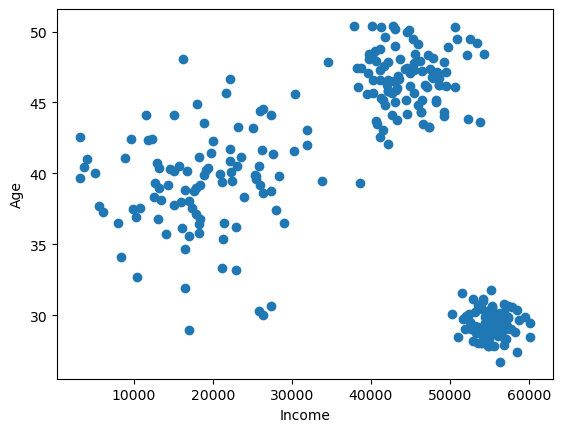

In [65]:
plt.scatter(df['income'],df['age'])
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

In [66]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(df)

/Users/nachiketh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [67]:
#internal cohesion
# inertia

km.inertia_ 

6107696328.700777

In [68]:
km.cluster_centers_ # co-ordinates of cluster centers

array([[5.46756522e+04, 3.17004348e+01],
       [1.81447917e+04, 3.91744792e+01],
       [4.30539326e+04, 4.64191011e+01]])

In [69]:
km.labels_

array([2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2,
       0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1,
       2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1,
       2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0,
       2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0,
       1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1,
       2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2], d

In [70]:
df['cluster'] = km.labels_

In [71]:
df.head()

,income,age,cluster
0,41100.0,48.75,2
1,54100.0,28.10,0
2,47800.0,46.75,2
3,19100.0,40.25,1
4,18200.0,35.80,1


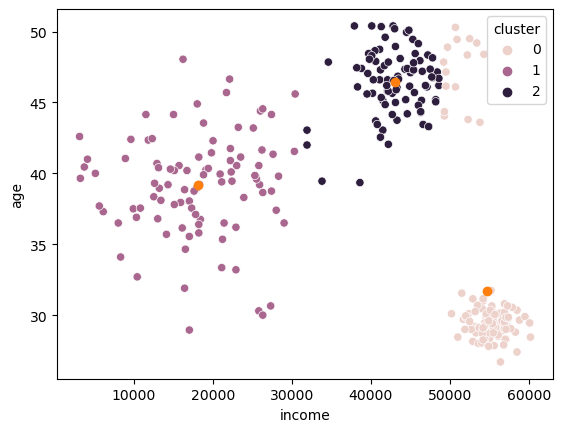

In [72]:
import seaborn as sns
sns.scatterplot(x='income',y='age',hue='cluster',data=df)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])
plt.show()

/Users/nachiketh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


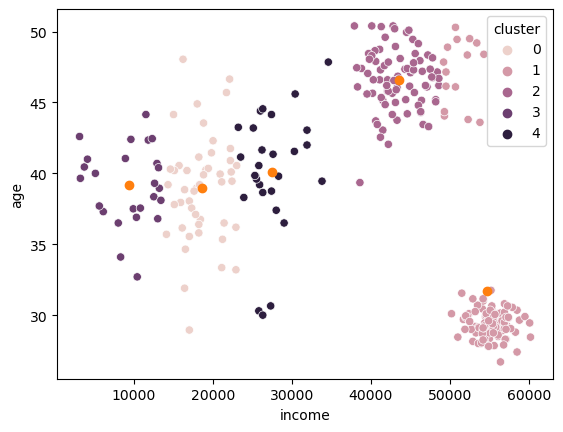

In [73]:
km = KMeans(n_clusters=5)
km.fit(df)
df['cluster'] = km.labels_
import seaborn as sns
sns.scatterplot(x='income',y='age',hue='cluster',data=df)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])
plt.show()

## Standard Scaler 

In [74]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scaled_df = ss.fit_transform(df.drop(columns='cluster'))
scaled_df[:3]

array([[ 0.09718548,  1.3701637 ],
       [ 0.90602749, -1.3791283 ],
       [ 0.51405021,  1.10388844]])

In [75]:
scaled_df = pd.DataFrame(scaled_df, columns=['income','age'])

/Users/nachiketh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


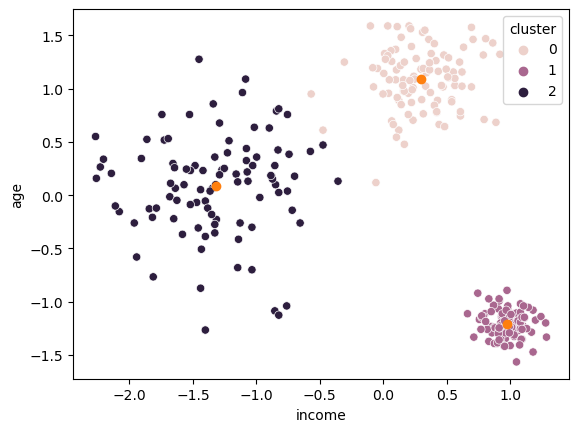

In [76]:
km = KMeans(n_clusters=3)
km.fit(scaled_df)
scaled_df['cluster'] = km.labels_
import seaborn as sns
sns.scatterplot(x='income',y='age',hue='cluster',data=scaled_df)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])
plt.show()

In [77]:
km.inertia_

58.30120949883502

In [78]:
df.head()

,income,age,cluster
0,41100.0,48.75,2
1,54100.0,28.10,1
2,47800.0,46.75,2
3,19100.0,40.25,0
4,18200.0,35.80,0


In [79]:
df['cluster'] = km.labels_

In [80]:
df

,income,age,cluster
0,41100.0,48.75,0
1,54100.0,28.10,1
2,47800.0,46.75,0
3,19100.0,40.25,2
4,18200.0,35.80,2
...,...,...,...
295,38300.0,46.10,0
296,27400.0,44.15,2
297,54200.0,28.25,1
298,41800.0,44.85,0


In [81]:
df.groupby("cluster")['income','age'].agg(['mean','std','count','median'])

/var/folders/xk/0pfb24315clcz5hhv8f69q5c0000gp/T/ipykernel_3989/1076604522.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("cluster")['income','age'].agg(['mean','std','count','median'])


income                                    age                  \
                 mean          std count   median       mean       std count   
cluster                                                                        
0        44308.737864  4390.321503   103  44300.0  46.627184  2.151559   103   
1        55204.000000  1951.943864   100  55200.0  29.384000  0.921458   100   
2        18321.649485  6924.747691    97  18200.0  39.140206  3.558665    97   

                 
         median  
cluster          
0        46.700  
1        29.375  
2        39.450

## Elbow Plot

In [82]:
from sklearn.metrics import silhouette_score

/Users/nachiketh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nachiketh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nachiketh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nachiketh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

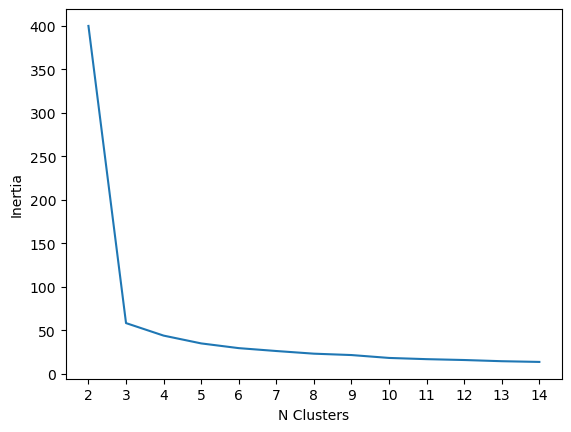

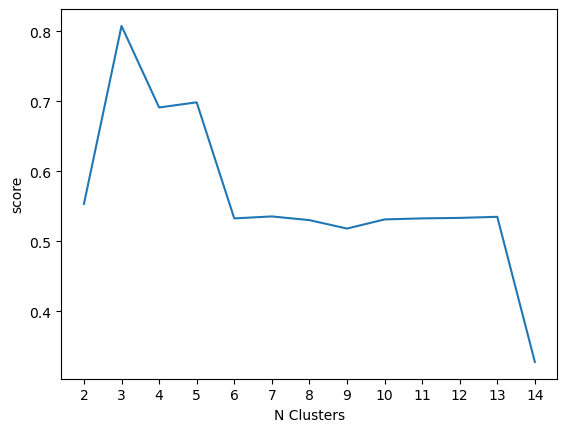

In [83]:
# opencv
inertia = []
score = []
for i in range(2,15):
    km = KMeans(n_clusters=i)
    km.fit(scaled_df)
    inertia.append(km.inertia_)
    score.append(silhouette_score(scaled_df,km.labels_))

plt.plot(range(2,15), inertia)
plt.xticks(range(2,15))
plt.xlabel("N Clusters")
plt.ylabel("Inertia")
plt.show()

plt.plot(range(2,15), score)
plt.xticks(range(2,15))
plt.xlabel("N Clusters")
plt.ylabel("score")
plt.show()

/Users/nachiketh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


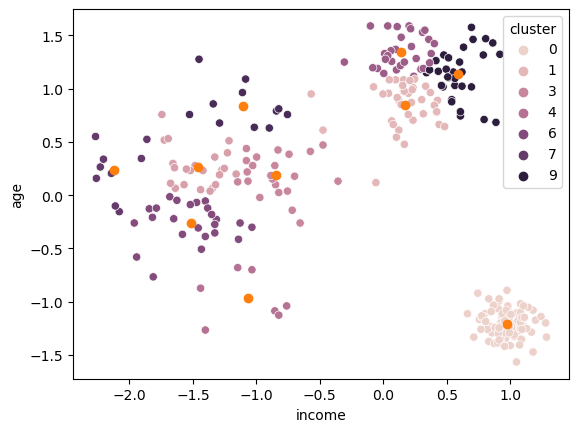

In [85]:
km = KMeans(n_clusters=10)
km.fit(scaled_df)
scaled_df['cluster'] = km.labels_
import seaborn as sns
sns.scatterplot(x='income',y='age',hue='cluster',data=scaled_df)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])
plt.show()

In [86]:
from sklearn.metrics import silhouette_score

In [87]:
silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

# Hierachial Clustering

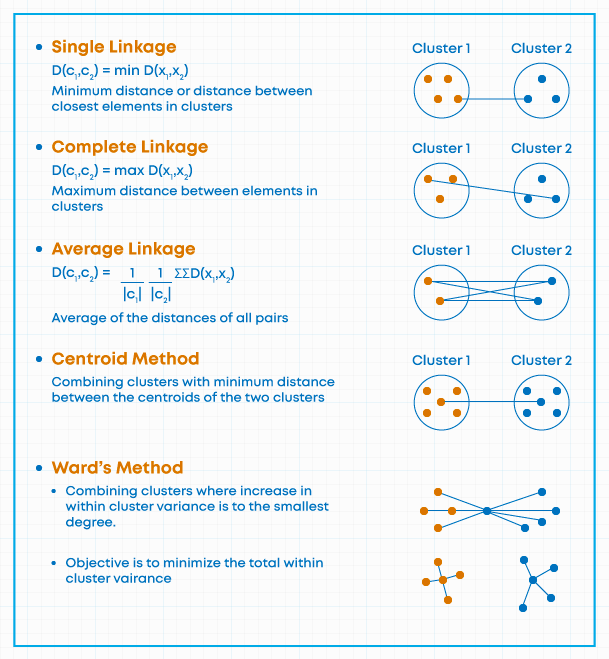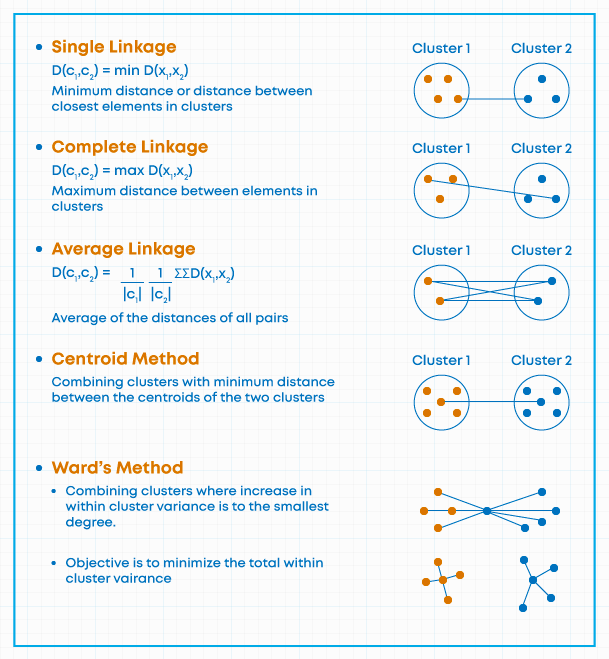

In [88]:
df = pd.read_csv("https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/beer.csv")

In [89]:
df.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      20 non-null     object 
 1   calories  20 non-null     int64  
 2   sodium    20 non-null     int64  
 3   alcohol   20 non-null     float64
 4   cost      20 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 932.0+ bytes


In [91]:
X_scaled = df.drop(columns='name')

In [92]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X_scaled)

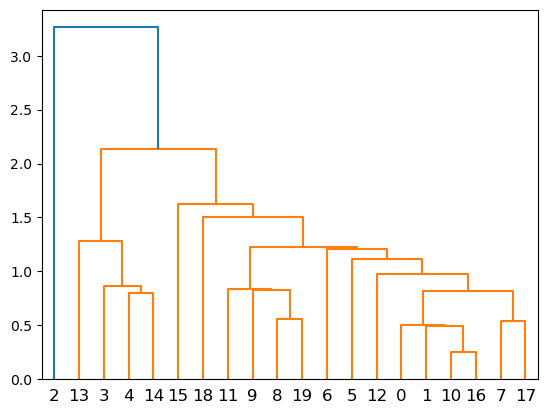

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage

z = linkage(X_scaled,method='single', metric='euclidean')
dendrogram(z)
#plt.xticks(ticks=range(len(df['name'])),labels=df['name'][[int(i) for i in output['ivl']]].values)
plt.show()

In [110]:
df['name'][[int(i) for i in output['ivl']]]

2                Lowenbrau
13                   Becks
3              Kronenbourg
4                 Heineken
14                   Kirin
15       Pabst_Extra_Light
18     Olympia_Goled_Light
11             Coors_Light
9          Budweiser_Light
8              Miller_Lite
19           Schlitz_Light
6               Augsberger
5            Old_Milwaukee
12          Michelob_Light
0                Budweiser
1                  Schlitz
10                   Coors
16                   Hamms
7     Srohs_Bohemian_Style
17     Heilemans_Old_Style
Name: name, dtype: object

In [108]:
df['name'][[int(i) for i in output['ivl']]]

2                Lowenbrau
13                   Becks
3              Kronenbourg
4                 Heineken
14                   Kirin
15       Pabst_Extra_Light
18     Olympia_Goled_Light
11             Coors_Light
9          Budweiser_Light
8              Miller_Lite
19           Schlitz_Light
6               Augsberger
5            Old_Milwaukee
12          Michelob_Light
0                Budweiser
1                  Schlitz
10                   Coors
16                   Hamms
7     Srohs_Bohemian_Style
17     Heilemans_Old_Style
Name: name, dtype: object

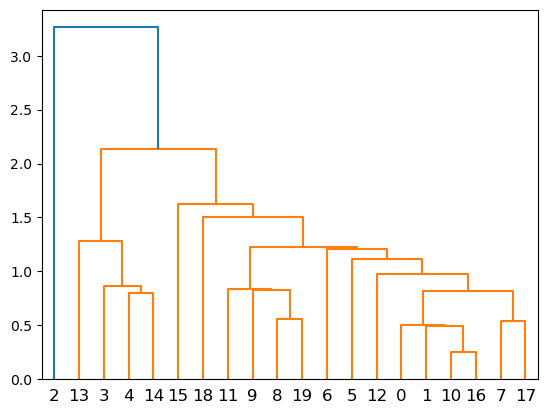

In [96]:
output = dendrogram(z)

In [111]:
from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
hierarchial.fit(X_scaled)

/Users/nachiketh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=3)

In [112]:
hierarchial.labels_

array([0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0])